In [29]:
# setup gdrive
import configparser
from google.colab import drive
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import mimetypes
import urllib
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/gdrive/My Drive/Visualization/Data/'
path_conf = path_current + '/gdrive/My Drive/Visualization/'
# the "path_img" is the position where final image will be saved
path_img = path_current + '/gdrive/My Drive/Visualization/Images/'

## Scatter Class
- Single Scatter Plot
- Multi-scatter Plot
- Multi-scatter Plot with Different Markers
- Correlogram
- Multi-Correlogram

In [0]:
class scatter_plot:
  def __init__(self, plotwidth=10, plothight=6, color_grid='darkgrid', tick_size=14,
               isframe=True, my_font='DejaVu Sans', backgrid=True, title=False, issave_image=False):
    
    self.plotwidth = plotwidth
    self.plothight = plothight
    self.color_grid = color_grid
    self.tick_size = tick_size
    self.isframe = isframe
    self.my_font = my_font
    self.backgrid = backgrid
    self.title = title
    self.issave_image = issave_image
  
  ## read file function: read three kinds of format file csv/excel/text
  # if you have other format of file, please change the function manually
  def read_file(self, file):
    file_url = urllib.request.pathname2url(file)
    ftype = mimetypes.guess_type(file_url, strict=True)[0]

    ## read data file according to its formate, default includes three types of files: csv/excel/text
    # read csv format data from the parking dataset
    if 'csv' in ftype:
      # usecols: return a subset of the columns, here choose one column to use in the line chart
      data = pd.read_csv(path+file)
    # read excel format data from the parking dataset
    elif 'sheet' in ftype:
      data = pd.read_excel(path+file)
    # read text format data from the parking dataset
    elif ftype == 'text/plain':
      data = pd.read_csv(path+file, sep="\t")
    else:
      print("File type cannot find!")
    return data
  
  ## scatterBasic function, data visualisation of single line plot
  # file: file name of your data source
  # col_namex: the name of column which was chose as x axis' data
  # col_namey: the name of column which was chose as y axis' data
  # x_lable: text of x lable
  # y_lable: text of y lable
  # plotwidth: width of the plot, two columns paper default set to 10
  # plothight: hight of the plot, two columns paper default set to 6
  # color_grid: if backgrid is True, define the color of background grid
  # color_scatter: the color of scatter
  # tick_size: the size of ticks
  # marker: the shape of scatters, default as None
  # scatter_alpha: transparency of scatters default sets as 0.5
  # my_font: the typeface of x, y lables
  # backgrid: True or False as options;
  # if it is True, add grid in background of the plot, if it is false, the background set to white
  # is_fitline: True or False as options. If it is True, add fitline along scatters
  # title: True or False as options. If it is True, add title for the plot
  # issave_image: True or False as options; if it is True, save the image in "path_img"
  def scatterBasic(self, file, col_namex, col_namey, x_lable, y_lable, plotwidth=10, plothight=6, color_grid='white',
                   color_scatter='tab:blue', tick_size=14, marker=None, scatter_alpha=0.5, labeltext_size=18,
                   title_size=20, isframe=True, my_font='DejaVu Sans', backgrid=True, is_fitline=False, title=False,
                   issave_image=False):
    
    ## read file
    data = self.read_file(file)
    x = data[col_namex]
    y = data[col_namey]

    ## plot size setting
    # figsize: the size of the line chart, (width,hight)
    fig, ax = plt.subplots(figsize =(self.plotwidth, self.plothight))

    ## background grid setting
    if self.backgrid == True:
      sns.set_style(self.color_grid) 
    elif self.backgrid == False:
      pass
  
    ## drawing plot
    # # maker: define shape of marker
    # fit_reg: adding a regression fitting line
    # scatter_kws defines color, transparency, and size
    # without regression fit
    sns.regplot(x=x, y=y, marker=marker, fit_reg=is_fitline, scatter_kws={"color":color_scatter,"alpha":scatter_alpha,"s":20})

    ## size of numbers on the ticks of x,y axis' setting
    for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(self.tick_size)
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(self.tick_size)

    ## x, y axis setting
    # fontsize: x, y title size
    # labelpad: scalar, optional, default: None 
    ax.set_xlabel(x_lable, fontproperties=self.my_font, fontsize=labeltext_size, labelpad=10)
    ax.set_ylabel(y_lable, fontproperties=self.my_font, fontsize=labeltext_size, labelpad=10)

    # if False, top and right borders removing
    if self.isframe == True:
      pass
    elif self.isframe == False:
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
  
    ## title and position
    if self.title == True:
      ax.set_title('Title', fontsize=title_size, loc='center')
    elif self.title == False:
      pass

    ## save image as pdf to path folder
    # bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
    if self.issave_image == True:
      plt.savefig(path_img+'scatter_basic.jpg', bbox_inches='tight')
    elif self.issave_image == False:
      pass
    # showing the image
    plt.show()
  
  ## scatterMulti function, data visualisation of single line plot
  # file: file name of your data source
  # col_namex: the name of column which was chose as x axis' data
  # col_namey: the name of column which was chose as y axis' data
  # category_colname: the column of sort data
  # x_lable: text of x lable
  # y_lable: text of y lable
  # plotwidth: width of the plot, two columns paper default set to 10
  # plothight: hight of the plot, two columns paper default set to 6
  # color_num: number of category in scatter
  # color_grid: if backgrid is True, define the color of background grid
  # tick_size: the size of ticks
  # my_font: the typeface of x, y lables
  # colorpalette: the name of seaborn color palette
  # backgrid: True or False as options;
  # if it is True, add grid in background of the plot, if it is false, the background set to white
  # title: True or False as options. If it is True, add title for the plot
  # issave_image: True or False as options; if it is True, save the image in "path_img"
  def scatterMulti(self, file, col_namex, col_namey, category_colname, x_lable, y_lable, plotwidth=10, plothight=6,
                   color_num=2, color_grid='darkgrid', tick_size=14, isframe=True, my_font='DejaVu Sans',
                   labeltext_size=18, title_size=20, colorpalette='muted', backgrid=True, title=False,
                   issave_image=False):
  
    ## read file
    data = self.read_file(file)
    x = data[col_namex]
    y = data[col_namey]
    z = data[category_colname]

    ## plot size setting
    # figsize: the size of the line chart, (width,hight)
    fig, ax = plt.subplots(figsize =(self.plotwidth, self.plothight))

    ## background grid setting
    if self.backgrid == True:
      sns.set_style(self.color_grid)
    elif self.backgrid == False:
      pass

    # hue: the argument to provide a factor variable for each group
    # palette: can change to another palette, or define the color for each group
    sns.scatterplot(x=x, y=y, hue=z, data=data, palette=sns.color_palette(colorpalette, color_num))
  
    ## size of numbers on the ticks of x,y axis' setting
    for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(self.tick_size)
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(self.tick_size)

    ## x, y axis setting
    # fontsize: x, y title size
    # labelpad: scalar, optional, default: None 
    ax.set_xlabel(x_lable, fontproperties=self.my_font, fontsize=labeltext_size, labelpad=10)
    ax.set_ylabel(y_lable, fontproperties=self.my_font, fontsize=labeltext_size, labelpad=10)

    # if False, top and right borders removing
    if self.isframe == True:
      pass
    elif self.isframe == False:
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
  
    ## title and position
    if self.title == True:
      ax.set_title('Title', fontsize=title_size, loc='center')
    elif self.title == False:
      pass

    ## save image as pdf to path folder
    # bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
    if self.issave_image == True:
      plt.savefig(path_img+'scatter_multi.jpg', bbox_inches='tight')
    elif self.issave_image == False:
      pass
    # showing the image
    plt.show()

  ## scatterMultimarkers function, data visualisation of single line plot
  # file: file name of your data source
  # col_namex: the name of column which was chose as x axis' data
  # col_namey: the name of column which was chose as y axis' data
  # category_colname: the column of sort data
  # x_lable: text of x lable
  # y_lable: text of y lable
  # plotwidth: width of the plot, two columns paper default set to 10
  # plothight: hight of the plot, two columns paper default set to 6
  # color_num: the number of category in scatter plot
  # color_grid: if backgrid is True, define the color of background grid
  # tick_size: the size of ticks
  # my_font: the typeface of x, y lables
  # colorpalette: the name of seaborn color palette
  # backgrid: True or False as options;
  # if it is True, add grid in background of the plot, if it is false, the background set to white
  # title: True or False as options. If it is True, add title for the plot
  # issave_image: True or False as options; if it is True, save the image in "path_img"
  def scatterMultimarkers(self, file, col_namex, col_namey, category_colname, x_lable, y_lable, plotwidth=10, plothight=6,
                          color_num=2, color_grid='darkgrid', labeltext_size=18, title_size=20, tick_size=14, isframe=True,
                          my_font='DejaVu Sans', colorpalette='colorblind', backgrid=True, title=False, issave_image=False):
  
    ## read file
    data = self.read_file(file)
    x = data[col_namex]
    y = data[col_namey]
    z = data[category_colname]

    ## plot size setting
    # figsize: the size of the line chart, (width,hight)
    fig, ax = plt.subplots(figsize =(self.plotwidth, self.plothight))

    ## background grid setting
    if self.backgrid == True:
      sns.set_style(self.color_grid)
    elif backgrid == False:
      pass

    ## drawing plot    
    # hue : name of variables in data or vector data;
    # grouping variable that will produce points with different colors;
    # can be either categorical or numeric, although color mapping will behave differently in latter case
    sns.scatterplot(x=x, y=y, hue=z, style=z, data=data, palette=sns.color_palette(colorpalette, color_num))

    ## size of numbers on the ticks of x,y axis' setting
    for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(self.tick_size)
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(self.tick_size)

    ## x, y axis setting
    # fontsize: x, y title size
    # labelpad: scalar, optional, default: None 
    ax.set_xlabel(x_lable, fontproperties=self.my_font, fontsize=labeltext_size, labelpad=10)
    ax.set_ylabel(y_lable, fontproperties=self.my_font, fontsize=labeltext_size, labelpad=10)

    # if False, top and right borders removing
    if self.isframe == True:
      pass
    elif self.isframe == False:
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
  
    ## title and position
    if self.title == True:
      ax.set_title('Title', fontsize=title_size, loc='center')
    elif self.title == False:
      pass

    ## save image as pdf to path folder
    # bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
    if self.issave_image == True:
      plt.savefig(path_img+'scatter_multimarkers.jpg', bbox_inches='tight')
    elif self.issave_image == False:
      pass
    # showing the image
    plt.show()

  ## scatterCorrelogram function, data visualisation of single line plot
  # file: file name of your data source
  # plotwidth: width of the plot, two columns paper default set to 8
  # plothight: hight of the plot, two columns paper default set to 6
  # color_grid: if backgrid is True, define the color of background grid
  # backgrid: True or False as options;
  # if it is True, add grid in background of the plot, if it is false, the background set to white
  # issave_image: True or False as options; if it is True, save the image in "path_img"
  def scatterCorrelogram(self, file, plotwidth=8, plothight=6, color_grid='darkgrid',
                         backgrid=True, issave_image=False):
    
    ## read file
    data = self.read_file(file)

    ## plot size setting
    # figsize: the size of the line chart, (width,hight)
    plt.figure(figsize =(self.plotwidth, self.plothight), dpi= 80)

    ## background grid setting
    if self.backgrid == True:
      sns.set_style(self.color_grid)
    elif self.backgrid == False:
      pass

    ## drawing plot
    correlogram = sns.pairplot(data, kind="reg")

    # save image as pdf to path folder
    # bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
    if self.issave_image == True:
      plt.savefig(path_img+'scatter_correlogram.jpg', bbox_inches='tight')
    elif self.issave_image == False:
      pass
    # show the image
    plt.show()

  ## scatterCorrelogram function, data visualisation of single line plot
  # file: file name of your data source
  # category_colname: 
  # plotwidth: width of the plot, two columns paper default set to 8
  # plothight: hight of the plot, two columns paper default set to 6
  # color_grid: if backgrid is True, define the color of background grid
  # color_palette: the name of seaborn color palette
  # backgrid: True or False as options;
  # if it is True, add grid in background of the plot, if it is false, the background set to white
  # issave_image: True or False as options; if it is True, save the image in "path_img"
  def scatterCorrelogrammulti(self, file, category_colname, plotwidth=8, plothight=6, color_grid='darkgrid', 
                              color_palette='colorblind', backgrid=True, issave_image=False):
  
    ## read file
    data = self.read_file(file)

    ## plot size setting
    # figsize: the size of the line chart, (width,hight)
    plt.figure(figsize =(self.plotwidth, self.plothight), dpi= 80)

    ## background grid setting
    if self.backgrid == True:
      sns.set_style(self.color_grid)
    elif self.backgrid == False:
      pass

    ## drawing plot
    # optional argument,  plot_kws=dict(s=80, edgecolor="white", linewidth=2.5)
    # palette="Set2"
    sns.pairplot(data, kind="scatter", hue=category_colname, markers=["o", "s", "D"], palette=color_palette)

    # save image as pdf to path folder
    # bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
    if self.issave_image == True:
      plt.savefig(path_img+'scatter_correlogrammulti.jpg', bbox_inches='tight')
    elif self.issave_image == False:
      pass
    # show the image
    plt.show()

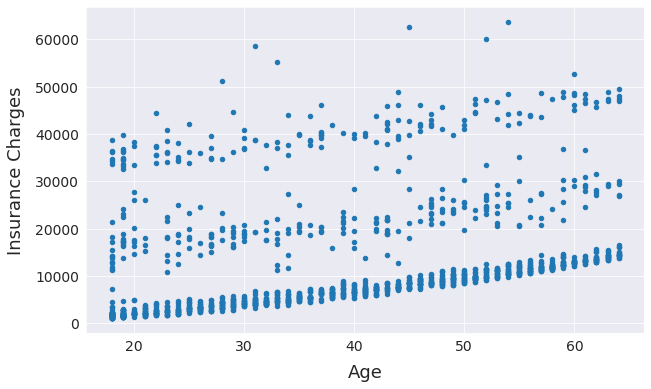

In [32]:
plot = scatter_plot(plotwidth=10, plothight=6, color_grid='darkgrid', tick_size=14,
                    isframe=True, my_font='DejaVu Sans', backgrid=True, title=False, issave_image=False)
plot.scatterBasic(file='insurance.csv', col_namex='age', col_namey='charges', x_lable='Age',
                  y_lable='Insurance Charges', plotwidth=10, plothight=6, backgrid=True, isframe=True, color_grid='white',
                  tick_size=14, color_scatter='tab:blue', scatter_alpha=1, is_fitline=False, my_font='DejaVu Sans',
                  title=False, issave_image=False)

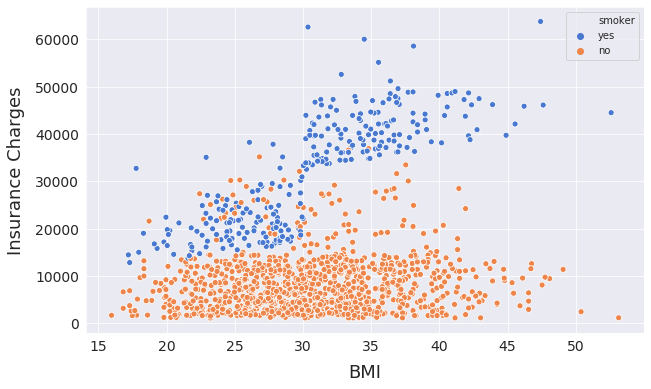

In [33]:
plot = scatter_plot(plotwidth=10, plothight=6, color_grid='darkgrid', tick_size=14,
                    isframe=True, my_font='DejaVu Sans', backgrid=True, title=False, issave_image=False)
plot.scatterMulti(file='insurance.csv', col_namex='bmi', col_namey='charges', category_colname='smoker',
                  x_lable='BMI', y_lable='Insurance Charges', plotwidth=10, plothight=6, isframe=True,
                  color_grid='darkgrid', tick_size=14, my_font='DejaVu Sans',
                  backgrid=True, title=False, issave_image=False)

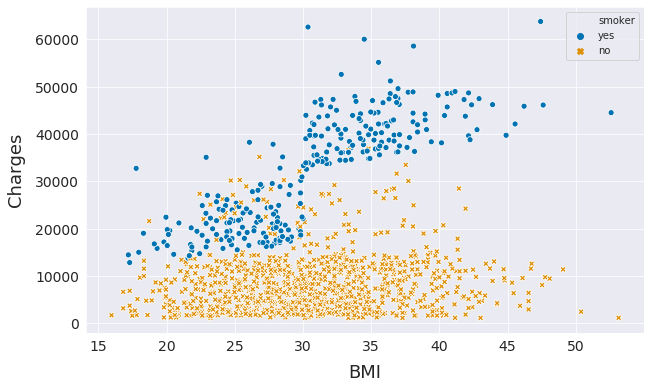

In [34]:
plot = scatter_plot(plotwidth=10, plothight=6, color_grid='darkgrid', tick_size=14,
                    isframe=True, my_font='DejaVu Sans', backgrid=True, title=False, issave_image=False)
plot.scatterMultimarkers(file='insurance.csv', col_namex='bmi', col_namey='charges', category_colname='smoker',
                         x_lable='BMI', y_lable='Charges', plotwidth=10, plothight=6, isframe=True, color_grid='darkgrid',
                         tick_size=14, my_font='DejaVu Sans',
                         backgrid=True, title=False, issave_image=False)

<Figure size 800x480 with 0 Axes>

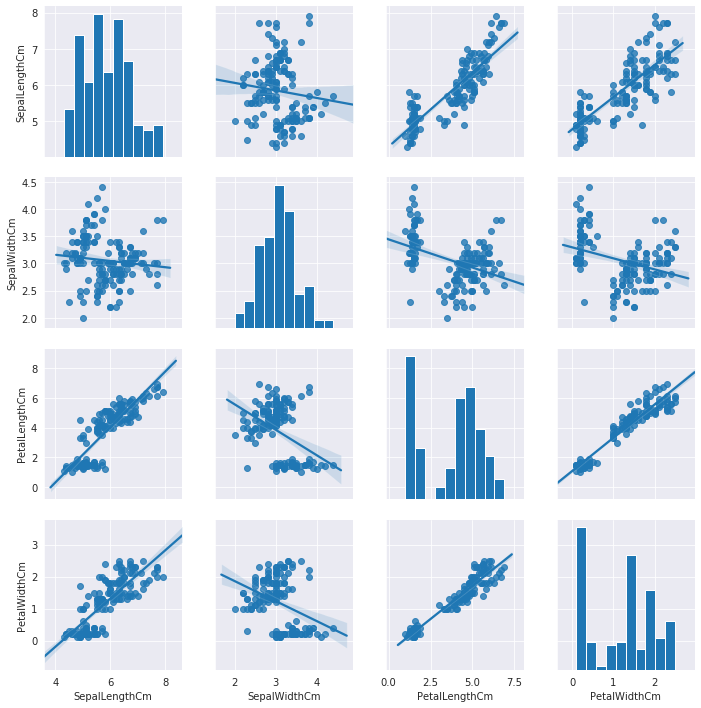

In [35]:
plot = scatter_plot(plotwidth=10, plothight=6, color_grid='darkgrid', tick_size=14,
                    my_font='DejaVu Sans', backgrid=True, title=False, issave_image=False)
plot.scatterCorrelogram(file='iris.csv', plotwidth=8, plothight=6, color_grid='darkgrid',
                        backgrid=True, issave_image=False)

<Figure size 800x480 with 0 Axes>

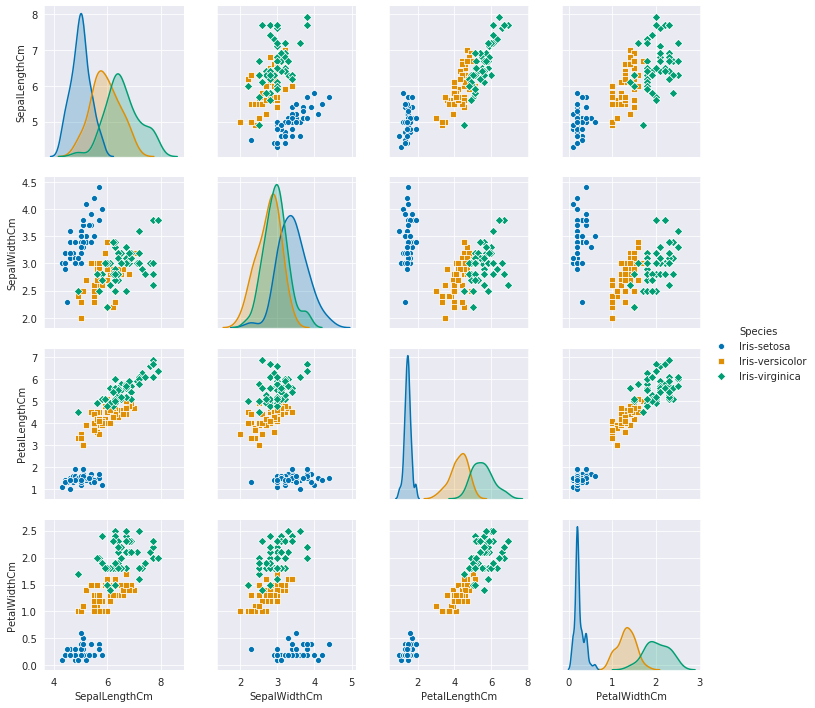

In [36]:
plot = scatter_plot(plotwidth=10, plothight=6, color_grid='darkgrid', tick_size=14,
                    my_font='DejaVu Sans', backgrid=True, title=False, issave_image=False)
plot.scatterCorrelogrammulti(file='iris.csv', category_colname='Species', plotwidth=8, plothight=6, color_grid='darkgrid',
                             backgrid=True, issave_image=False)